<a href="https://colab.research.google.com/github/KJ22222/ESSA/blob/main/11_28_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 딥러닝 준비

- 케라스의 본래 목적은 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것
- 백엔드 엔진을 쉽게 변경할 수 있음
- 2.4 버전 이후로 텐서플로만 지원

##1-1 주요 용어

###1-1-1 하이퍼파라미터
- 가중치와 편향은 자동 업데이트 되고 조정되며 알아서 변하는값
- 학습 속도나 반복 훈련 횟수등은 직접 셜정->하이퍼파라미터

###1-1-2 과소적합 vs 과대적합
- 예측 데이터가 학습 데이터와 다른 분포를 갖거나 학습 데이터가 특정 레이블에 편항된 경우 예측 성능 저하->과소적합
- 학습 데이터를 지나치게 반복 학습하게 되어 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영 훈련 데이터에서 성능 좋고 예측 데이터에 대해서는 안 좋음->과대 적합
- 해결: 예측 데이터와 분포 동일하게 하고 불필요한 노이즈는 전처리를 통해 해소,훈련 데이터 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라고 판단하여 최종 모델 결정

###1-1-3 에포크
- 데이터 학습 과정을 여러번 반복하여 최적의 모델 가중치를 찾음
- 반복 훈련시 데이터셋을 전부 학습에 사용하는 1회의 훈련 루츠를 1 에포크

###1-1-4 손실함수
- 예측 값과 정답 값의 차이 또는 오차
- 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적
- 지도학습의 분류는 이진 분류와 다중 분로로 구분
- 회구 모델의 경우 

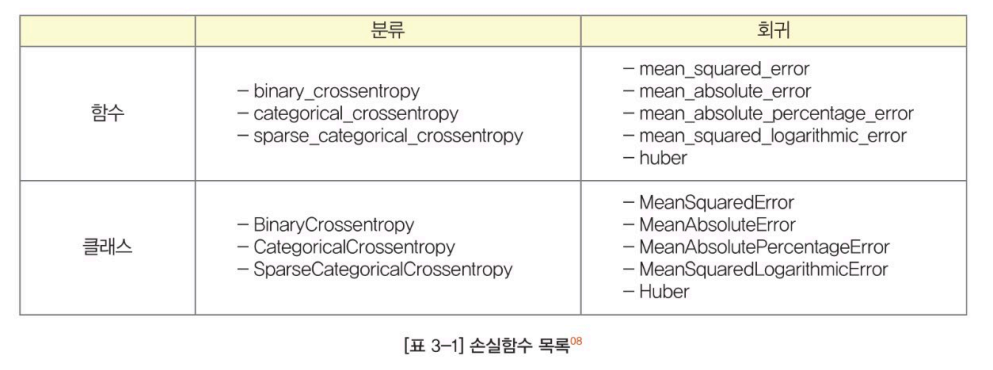

###1-1-5
- 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
- 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감

In [ ]:
import numpy as np

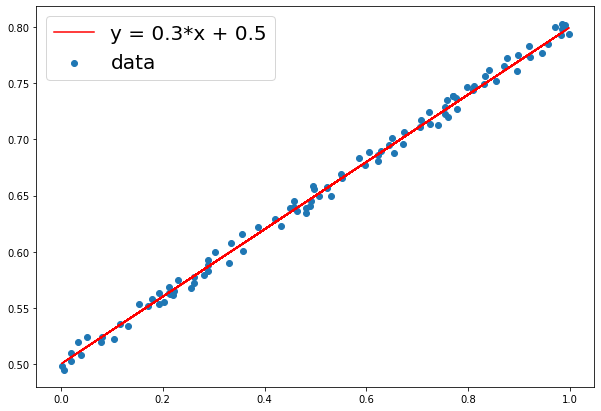

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.60884, b = 0.31565 error = 0.53436
 5 w = 0.56676, b = 0.35351 error = 0.32272
10 w = 0.52597, b = 0.37609 error = 0.23108
15 w = 0.49147, b = 0.39512 error = 0.16560
20 w = 0.46230, b = 0.41121 error = 0.11881
25 w = 0.43764, b = 0.42481 error = 0.08537
30 w = 0.41679, b = 0.43631 error = 0.06147
35 w = 0.39917, b = 0.44603 error = 0.04439
40 w = 0.38428, b = 0.45425 error = 0.03219
45 w = 0.37168, b = 0.46119 error = 0.02346
50 w = 0.36104, b = 0.46706 error = 0.01723
55 w = 0.35204, b = 0.47203 error = 0.01278
60 w = 0.34443, b = 0.47622 error = 0.00959
65 w = 0.33800, b = 0.47977 error = 0.00732
70 w = 0.33256, b = 0.48277 error = 0.00569
------------------------------------------------------------
73 w = 0.3, b = 0.5 error = 0.00495


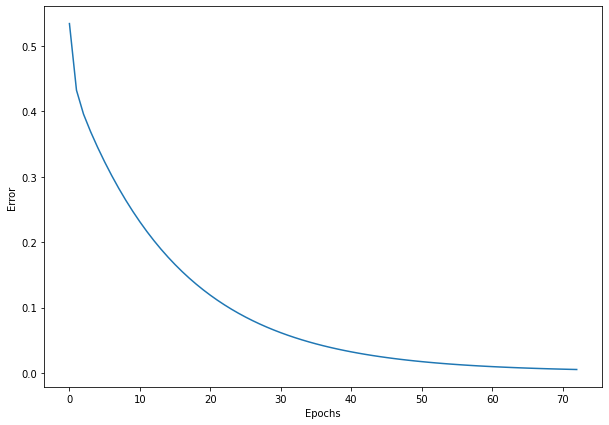

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

-> 가중치는 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있다.

#1-2  딥러닝 프로세스

##1-2-1 데이터 전처리
- 데이터셋 종류와 적용하려는 문제 유형에 따라 전처리 방법 다양
- 형태나 차원을 미리 구상해야 다음 단계에서 도움

##1-2-2
- 모델 구조 정의하고 생성하는 단계
- 모델 생성 단계
  - 순차적인건
  - 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 것

##1-2-3 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수,옵티마이저,평가지표등을 정의
- compie() 메소드를 적용하여 앞에서 열거한 여러 속성 값 설정


##1-2-4 모델 훈련
- fit()으로 훈련 시키고
- 훈련 데이터셋,검증 데이터셋, 에포트,배치크기 및 콜백 함수등을 지정

###1-2-5 모델 검증
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할때까지 과정 반복

##1-2-6 모델 예측

#2. 단순 신경망 훈련

#2-1 선형 회귀
- 모델의 기울기 a(대신 가중치 w 많이 사용)와 절편 b를 업데이트하면서 종속변수 y에 가장 근사한 1차 함수식을 완성해 나감

#2-2 뉴런
- 신경망은 여러 대의 레이어를 가지며 1개의 레이어는 개 이상의 뉴런으로 구성

#2-3 dense 레이어
- 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고 부르기도 함
- dense 레이어를 구성하는 노드 개수와 활성화 함수 지정 가능 layer 모듈에 있는 dense 레이어로 쉽게 구현
- 첫번째 인자로 노드 갯수,두번째 인자로 활성화 함수

#2-4 데이터셋 만들기


In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


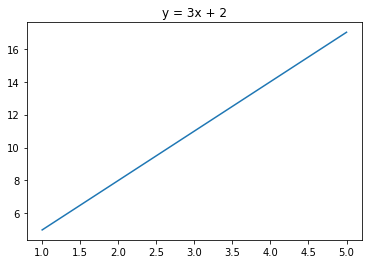

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

#2-5 Sequential API
- 층을 이어 붙이듯 시퀀스에 맞제 일려로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 갖게 됨
- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음

##2-5-1 모델 구조
- Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력

In [ ]:
import tensorflow as tf

In [ ]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

- add 함수로 생성된 모델 인스턴스에 층을 추가하는 방식
- 1번에 하나의 층 추가 가능

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

##2-5-2 입력 데이터 형태
- 첫번째 층은 input_shape 매개변수를 지정해야 함
- 데이터 셋의 shape은 투플혹인 리스트로 (150,4)라면 (4,)혹은 [4]로 지정할 수 있음

In [ ]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

##2-5-3 단순선형회귀 모델 정의
- 1개의 뉴련을 가지는 dense 레이러 한개 사용
- 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재하므로 input_shape=[1]지정


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

#2-6 모델 요약
- model.summary()로 모델 요약 확인할 수 있으며 모델의 구조를 확인할 수 있고 층별 노드의 개수가 표기 된다. 하단에는 훈련 시 업데이트할 파라미터의 개수가 표시

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


-> 모델에서 업데이트 파라미터가 가중치 w,b 2개이므로 요약에서도 총 파라미터 수가 2개로 표기 됨

#2-7 컴파일
- 옵티마이저,손실함수,평가지표등은 정의함->클래스 인스턴스(학습률,모멘텀등의 하이퍼파라미터 사용자 직접 지정 가능),함수,사정 정의된 문자열

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


- 옵티마이저는 확률적 경사 하강법 알고리즘인 sgd,손실함수로는 mse 평가지표는 mae로 지정

#2-8 훈련
- fit메소드를 적용하면 데이터 입력하여 모델 훈련->가중치 텐서를 업데이트하는 과정
- 입력,출력,반복 휸련할 에포크수를 지정

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 593ms/step - loss: 247.3580 - mae: 14.5689
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 144.1935 - mae: 11.1523
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 84.0739 - mae: 8.5441
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 49.0389 - mae: 6.5530
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 28.6220 - mae: 5.0328
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 16.7237 - mae: 3.8723
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 9.7896 - mae: 2.9863
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 5.7485 - mae: 2.3098
Epoch 9/1200
1/1 [==============================] - 0s 16ms/step - loss: 3.3933 - mae: 1.7933
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.0205 - mae: 1.3989
Epoch 11/1200
1/1 [==============================

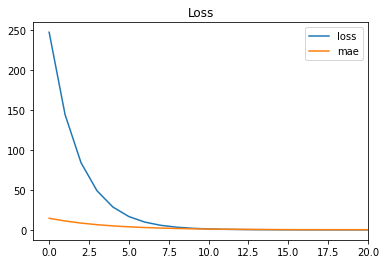

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

- 초기 10까지 빠르게 감소하다가 손실이 급격히 감소

#2-9 검증
- evaluate() 메서드로 모델의 성능을 검증

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 218ms/step - loss: 3.2667e-05 - mae: 0.0049


[3.266653584432788e-05, 0.004905796144157648]

- loss,mae 1200번 에포크 종료한 상태에서 출력된 값과 동일

#2-10 예측

In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 181ms/step


array([[32.02371]], dtype=float32)

#3. 심층 신경망으로 이미지 분류

##3-1 케라스 내장 데이터셋 로드

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


-> (데이터셋 크기,28,28)->데이터셋 크기,가로,세로

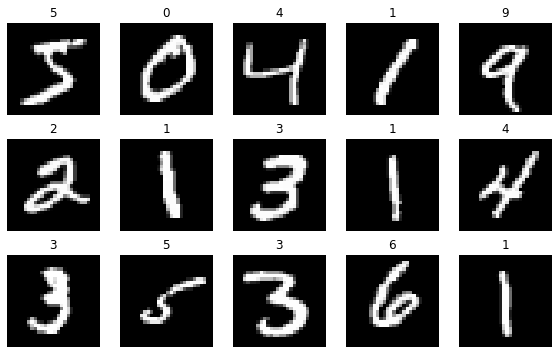

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

##3-2 데이터 전처리

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 데이터 범위를 정교화 하기 위해 최댓값인 255로 나눔

In [ ]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

##3-3 flatten 레이어
- 이미지의 크기는 (28,28) 2차원으로 이루어져있음
- dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 하므로 1차원으로 전처리 후 주입

In [ ]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


- flatten 레이어로 다차원 데이터를 1차원으로 펼쳐주는 방법

In [ ]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


#3-4 활성화 함수
- 입력을 비선형 출력으로 변화해주는 함수
- 주로 사용되는 활성화 함수 시그모이드,하이퍼볼릭 탄젠트.relu등이 있음


- dense에 activation 매개변수에 활성화 함수 입력

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

- 별도의 층으로 적용 가능 배치 정규화를 적용한 뒤 활성화 함수를 적용하고자 할때 많이 이용됨

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

#3-5 입력과 출력

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

- 출력층 노드가 2개 이상인 경우 softmmx 사용->다중 분류 문제

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

##3-6 손실함수

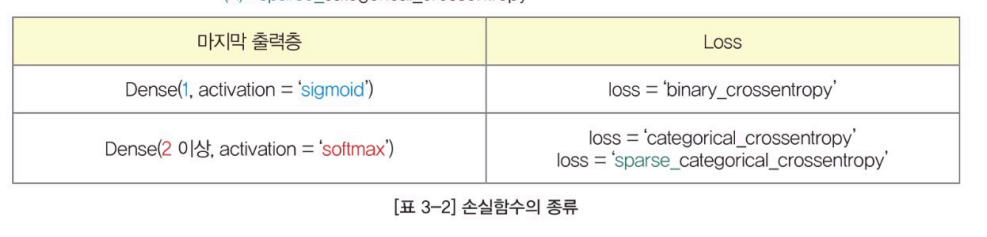

- 출력 데이터가 원핫 벡터면 위에꺼 아니면 아래 sparse 저거 하면 돼

In [ ]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우->0~9까지 레이블 값을 갖는 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

##3-7 옵티마이저
- 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음


In [ ]:
# 클래스 인스턴스로 지정->밑에와 다르게 학습률도 설정할 수 있음
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

##3-8 평가 지표
- 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고 가능

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

##3-9 훈련
- 검증 셋을 추가 지정하면 매 에포크마다 훈련 손실과 검증 손실 각 셋에 대한 평가지표를 나란히 출력함

In [ ]:
# 훈련
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2236 - accuracy: 0.9322 - val_loss: 0.1124 - val_accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0928 - accuracy: 0.9712 - val_loss: 0.1090 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0899 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0873 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0873 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0720 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0819 - val_accuracy:

##3-10 평가
- 훈련 다하고 evaluate()로 모델 성능 검증하고 평가 결과 확인

In [ ]:

# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9753
검증셋 정확도: 0.9753000140190125


##3-10 예측

In [ ]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# 예측 결과 출력
predictions[0]

array([9.9581733e-14, 1.8478739e-09, 5.3592322e-09, 8.7958230e-10,
       3.3015962e-12, 3.5072067e-11, 5.8170875e-14, 9.9999994e-01,
       9.0237245e-12, 7.4457676e-09], dtype=float32)

->모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것
- 넘파이 배열의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있음

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


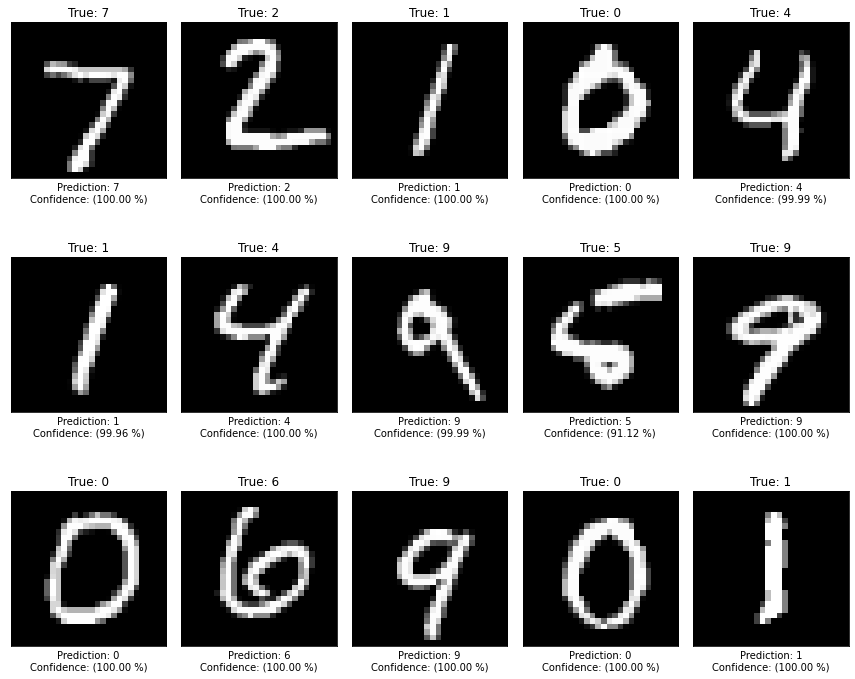

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

#4. 모델 세부 설정

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#4-1 초기값 설정

- 초기화 방법을 다르게 설정할 수 있음.기본 초기화 방법으로 glorot uniform 설정되어 있음

In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

- he normal로 변경하기 위해서 kernel_initializer사용

In [ ]:
# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [ ]:
# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

##4-2 규제

- 모델의 과대적합을 해소하기 위해 L1,L2 규제를 적용하기도 함
- 기본값으로 규체 적용 안되어 있어서 None 확인할 수 있음

In [ ]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_11',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


##4-3 드롭 아웃
- 모델의 층이 넓고 깊어질떄 모델은 훈련에 주어진 샘플의 과하게 적합하도록 학습하는 경향이 있음
- 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 갖지 못함
- 노드의 일부 신호를 임의로 삭제하게 되면 과재적합 방지->모델이 학습하는 가중치 파라미터 개수가 현저히 줄기 때문
- 훈련할때는 일부만 훈련하게 되지만 예측은 모든 노드 활용

In [ ]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

##4-4 배치 정규화

- 각 층에서 활성화 함수를 통과하기 전에 미니 배치의 스케일을 정규화
- 다음 층 전달이전에 스케일 조정하기 대문에 안정적인 훈련이 가능하고 성능 향상 가능
- 클래스 인스턴스를 생성하여 추가해주면 됨

In [ ]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

##4-5 활성화 함수
- 케라스에서 지원하는 다른 활성화 함수 적용 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용

In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.9160 - val_loss: 0.1451 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1313 - accuracy: 0.9612 - val_loss: 0.1100 - val_accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0955 - accuracy: 0.9717 - val_loss: 0.0987 - val_accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9770 - val_loss: 0.0825 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0869 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0900 - val_accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9853 - val_loss: 0.0893 - val_accuracy:

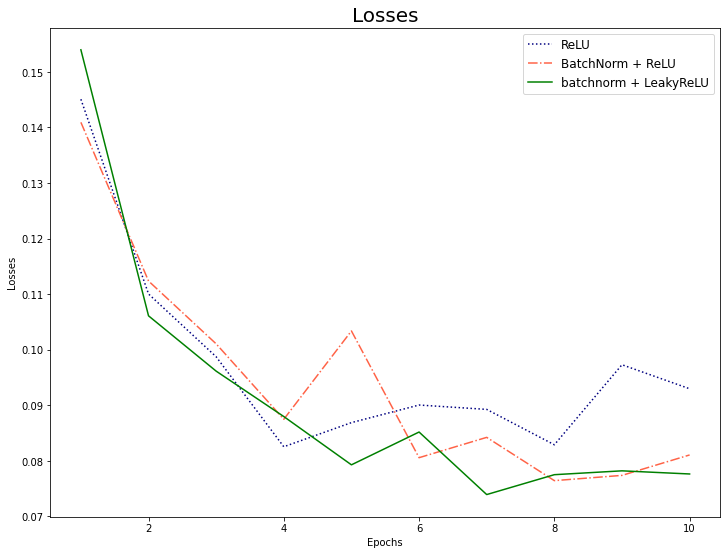

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()